# Using the Exploratory Functions

This notebook contains examples of how to use the Exploratory module to do exploratory data analysis on your data.The data used in the examples is the wines dataset provied within eagle datasets. Examples include missing data analyses, getting descriptive stats of continous and categorical features, running batteries of tests and outcome analyses.

In [1]:
from eagles.data_sets import data_loader as dl
from eagles.Exploratory import explore, missing, distributions, categories ,outcomes
from eagles.Exploratory.utils import plot_utils as pu

import pandas as pd
import numpy as np

In [2]:
wines = dl.load_wines()
print(wines.shape)

(178, 14)


To make the data a little more realistic I'll add in some missing data and also convert the "class" column to str type as they are read in as ints even though they are labels. Finally I'll add in an extra categorical feature to show more examples of analyzing categorical features using the explore package.

In [3]:
wines['class'] = wines['class'].astype(str)
wines = wines.mask(np.random.random(wines.shape) < .1)
wines['alcohol_bins'] = list(map(lambda x: np.nan if pd.isnull(x) else
                                 'below_12' if x < 12 else 
                                 'between_12_14' if x >= 12 and x <= 14 else 
                                 'greater_14' 
                                 , wines['alcohol']))


## Missing Data

If you would like a plot as well to see if there are any trends in the missing data you can simply set plot=True. When plot is false only the table is displayed and returned.

,feature,percent_missing
6,total_phenols,10.674157
10,color_intensity,10.674157
3,ash,10.112360
5,magnesium,9.550562
12,OD280_OD315_of_diluted_wines,9.550562
2,malic_acid,8.988764
8,nonflavanoid_phenols,8.988764
13,proline,8.988764
0,class,8.426966
4,alcalinity_of_ash,7.865169


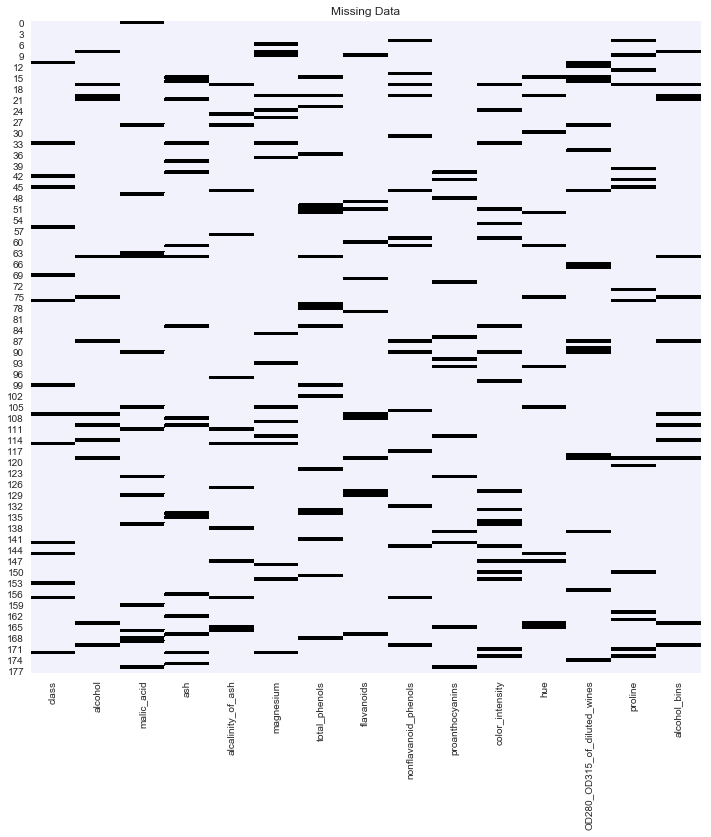

In [4]:
msg_df = missing.get_proportion_missing(data=wines, cols=[], plot=True)

## Get the base descriptive stats

get_base_descriptives() returns a pandas dataframe of stats. Stat options include "mean", "median", "std", "min", "max", "skew", "quantiles". If stats is left as default it will return all stats including the 90th quantile value unless otherwise specified. 

In [5]:
descipt_df = explore.get_base_descriptives(data=wines
                                           , stats=["mean", "max", "std", "quantiles"]
                                           , quantiles=[.75,.9], disp=True)

,feature,mean,max,std,75.0th_quantile,90.0th_quantile
0,alcohol,13.022667,14.75,0.786902,13.6700,14.100
1,malic_acid,2.295864,5.80,1.091165,3.0300,3.898
2,ash,2.369813,3.23,0.274896,2.5525,2.700
3,alcalinity_of_ash,19.344512,30.00,3.265797,21.5000,23.880
4,magnesium,99.844720,162.00,14.418980,108.0000,118.000
5,total_phenols,2.299686,3.85,0.625214,2.8000,3.100
6,flavanoids,2.027530,5.08,1.007873,2.8750,3.235
7,nonflavanoid_phenols,0.360741,0.66,0.125488,0.4375,0.530
8,proanthocyanins,1.593576,3.58,0.571359,1.9600,2.290
9,color_intensity,5.018868,13.00,2.337053,6.1150,8.532


## Looking at Distributions and Potential Caps

Beyond looking at basic descriptives the distributions module contains find_caps() which allows the user to find potential capping values for distributions. Options include "sd" and "percentile". Currently the direction of caps based on standard deviations are determined based on the skew direction as indicated by the skew value. If there is no determined skew direction then caps for both sides of the distribution are returned. 

,feature,mean,plus_2_SD,plus_3_SD,minus_2_SD,minus_3_SD,skew
0,alcohol,13.022667,14.596471,15.383373,11.448863,10.661961,-0.107347
1,proline,741.641975,1373.997824,1690.175748,NaN,NaN,0.798651
2,flavanoids,2.027530,4.043276,5.051149,0.011784,-0.996089,0.023135


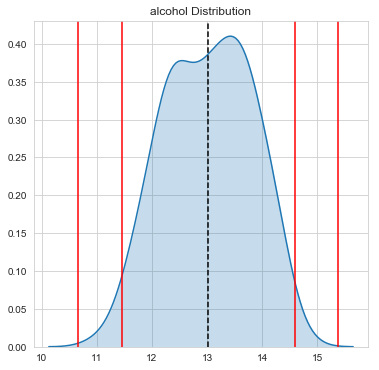

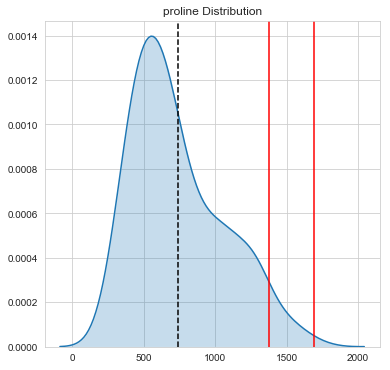

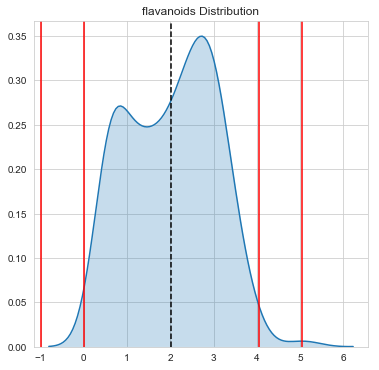

In [6]:
caps_df = distributions.find_caps(data=wines, cols=['alcohol', 'proline', 'flavanoids'], stats=['sd'] ,plot=True)

## Categories

The categories get_sample_stats() allows you to get the count and porportion of samples for catgegorical variables. 

,feature_by_category,count,proportion_samples
0,class_1,54,30.34
1,class_2,66,37.08
2,class_3,43,24.16
0,alcohol_bins_below_12,16,8.99
1,alcohol_bins_between_12_14,129,72.47
2,alcohol_bins_greater_14,20,11.24


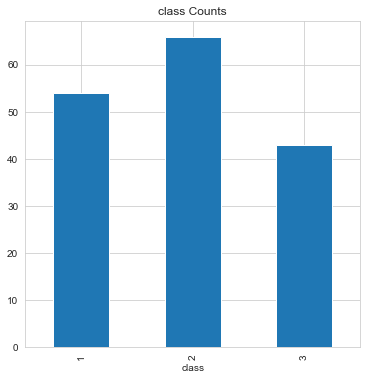

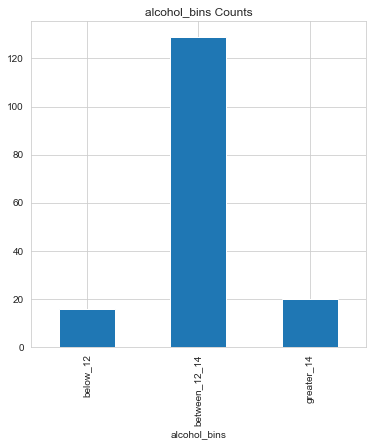

In [7]:
cat_df = categories.get_sample_stats(data=wines
                                     , cols=['class', 'alcohol_bins']
                                     , disp=True
                                     , plot=True)

Using get_multi_group_stats() allows you to look at interactions between buckets.

In [8]:
grps = categories.get_multi_group_stats(data=wines
                                        , group_cols=['class', 'alcohol_bins']
                                        , disp=True)

,class,alcohol_bins,count,proportion_samples
0,1,between_12_14,36,20.22
1,1,greater_14,14,7.87
2,2,below_12,15,8.43
3,2,between_12_14,45,25.28
4,3,between_12_14,39,21.91
5,3,greater_14,2,1.12


## Batteries

The run_battery() function allows you to run multiple test by simply calling the explore.run_battery() function. When no tests are passed into the tests parameter all available tests are run. Options include "info", "missing", "descriptive", "distributions", "correlations", "category_stats". The function returns a dictionary containing the test names as keys and returned dataframes as values.

,stat,value
0,n_rows,178.00
1,n_cols,5.00
2,total_memory,7248.00
3,total_percent_missing,7.64


,feature,percent_missing
2,proline,8.988764
0,class,8.426966
1,alcohol,7.303371
3,flavanoids,6.741573
4,hue,6.741573


,feature,mean,min,max,std
0,alcohol,13.022667,11.03,14.75,0.786902
1,proline,741.641975,278.00,1680.00,316.177924
2,flavanoids,2.027530,0.34,5.08,1.007873
3,hue,0.957867,0.48,1.71,0.227553


,feature,mean,plus_2_SD,plus_3_SD,minus_2_SD,minus_3_SD,skew
0,alcohol,13.022667,14.596471,15.383373,11.448863,10.661961,-0.107347
1,proline,741.641975,1373.997824,1690.175748,NaN,NaN,0.798651
2,flavanoids,2.027530,4.043276,5.051149,0.011784,-0.996089,0.023135
3,hue,0.957867,1.412973,1.640526,0.502761,0.275208,0.051118


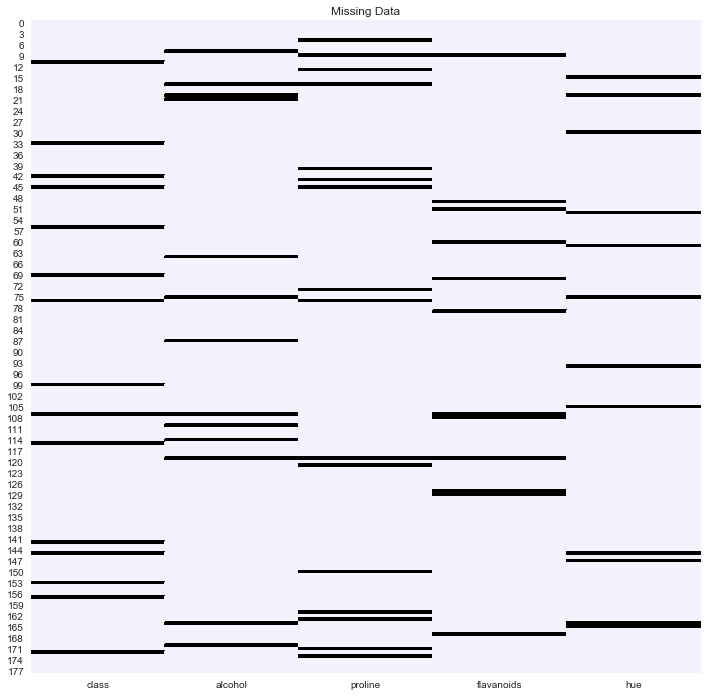

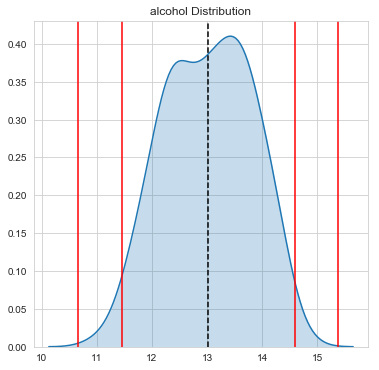

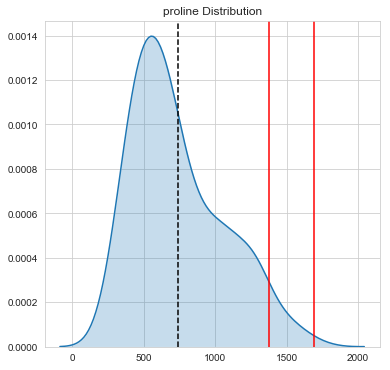

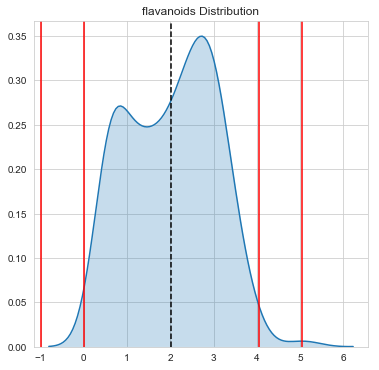

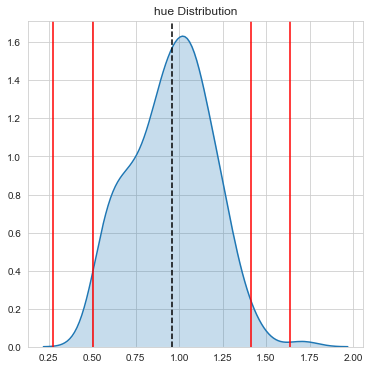

,alcohol,proline,flavanoids,hue
alcohol,1.000000,0.634427,0.197594,-0.072535
proline,0.634427,1.000000,0.513375,0.209748
flavanoids,0.197594,0.513375,1.000000,0.528641
hue,-0.072535,0.209748,0.528641,1.000000


,feature_by_category,count,proportion_samples
0,class_1,54,30.34
1,class_2,66,37.08
2,class_3,43,24.16


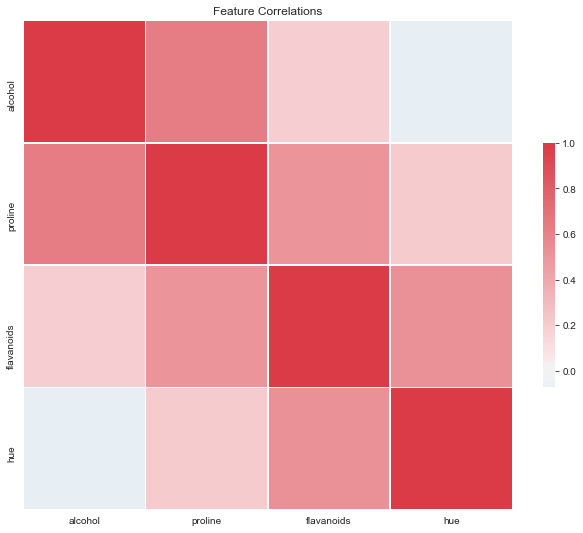

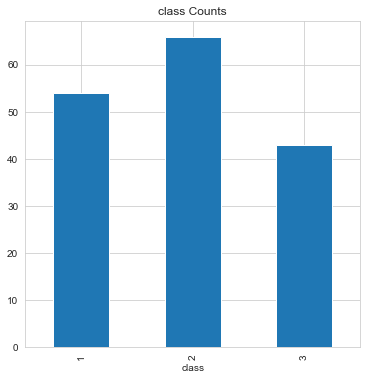

In [9]:
test_dict = explore.run_battery(data=wines
                                , categorical_cols=['class']
                                , continuous_cols=['alcohol', 'proline', 'flavanoids', 'hue']
                                , tests=[]
                                , gen_stats=["mean", "min", "max", "std"]
                                , cap_stats=["sd"]
                                , disp=True
                                , plot=True
                               )

## Outcome Analyses

Another option in the exploratory module is an outcome oriented analysis. More specifically rather then analyzing features individually you can use the outcomes module to look at the relationships between your features and a specific outcome. For the purposes of this example I will be creating a dummy class as the outcome as the regress analysis for categorical outcomes currently only supports binary logistic regression. For regression analyses it will also simply drop rows where it decets na values in the features. Note that individual functions within the outcomes module return pandas dataframes however the stats_by_outcome() functions returns a dictionary with the keys corresponding to the returned pandas dataframes.

,dummy,mean_alcohol,std_alcohol,mean_proline,std_proline,mean_flavanoids,std_flavanoids,mean_hue,std_hue
0,0,0.456265,0.192894,0.216089,0.130666,0.267052,0.190578,0.35286,0.203652
1,1,0.718280,0.119882,0.602904,0.160115,0.556631,0.084472,0.47122,0.089015


         Current function value: 0.410863
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36


,feature,coef,std err,z,P>|z|,[0.025,0.975]
0,alcohol,-5.8180,1.291,-4.506,0.000,-8.349,-3.287
1,proline,10.3256,2.006,5.148,0.000,6.395,14.257
2,flavanoids,5.0079,1.703,2.940,0.003,1.669,8.346
3,hue,-7.9811,1.856,-4.299,0.000,-11.620,-4.343


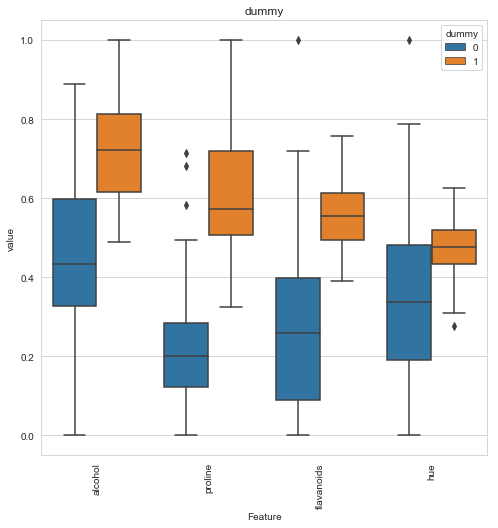

In [10]:
wines['dummy'] = list(map(lambda x: 1 if x == '1' else 0, wines['class']))

res_dict = outcomes.stats_by_outcome(data=wines
                                     , outcome_type='categorical'
                                     , outcome='dummy'
                                     , categorical_fts=[]
                                     , continuous_fts=['alcohol', 'proline', 'flavanoids', 'hue']
                                     , analyses=["descriptives", "regress"]
                                     , descriptive_stats=['mean', 'std']
                                     , scale='minmax'
                                     , plot=True
                                    )

In [11]:
print("Returned data: " + str(list(res_dict.keys())))

Returned data: ['descriptives', 'regress']


Now I'll do it with the outcome as a continous variable as oppoed to a categorical variable.

,outcome,feature,correlation
0,alcohol,proline,0.634427
1,alcohol,flavanoids,0.197594
2,alcohol,hue,-0.072535


,dummy,mean_alcohol,std_alcohol
0,0,0.456265,0.192894
1,1,0.718280,0.119882


,feature,coef,std err,t,P>|t|,[0.025,0.975]
0,dummy,-0.1619,0.066,-2.442,0.016,-0.293,-0.031
1,proline,1.0601,0.117,9.043,0.000,0.828,1.292
2,flavanoids,0.2763,0.141,1.961,0.052,-0.002,0.555
3,hue,0.1670,0.114,1.460,0.147,-0.059,0.393


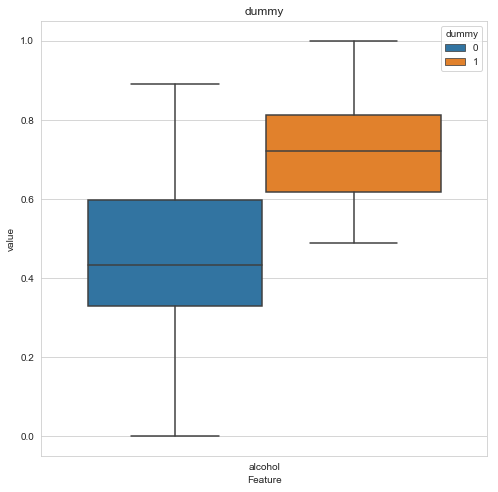

In [12]:
res_dict = outcomes.stats_by_outcome(data=wines
                                     , outcome_type='continuous'
                                     , outcome='alcohol'
                                     , categorical_fts=['dummy']
                                     , continuous_fts=['proline', 'flavanoids', 'hue']
                                     , analyses=["descriptives", "regress"]
                                     , descriptive_stats=['mean', 'std']
                                     , scale='minmax'
                                     , plot=True
                                    )

In [13]:
print("Returned data: " + str(list(res_dict.keys())))

Returned data: ['correlations', 'desc_df', 'regress']
